# Mahi Gangal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('../data/raw/amazon 2.csv')


## Research question/interests

1. **How discounts can affect the sales and number of ratings of different products?**

I would like to understand if there are any relations between discounts and customer ratings and reviews for different products. Also, if the customer's ratings change when products have higher discounts.

2. **How there is variation in the discount percentage in the top 3 categories?**

This will be an interesting question to analyse as it combines my other 2 research questions. 

3. **Which category of products has the highest sale?**

Generally, people prefer to shop online for only a certian category of products and tend to go to shops themselves to buy something that they actually need to try before buying. 


In [2]:
# first few rows of the dataset
df.head()

# shape of the dataset
df.shape

#  data types of each variable
df.dtypes

# Check for missing values
df.isnull().sum()

#Number of columns
df.columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

We can see from the above commands, that the dataset has 16 features or variables and 1465 entries. The dataset has only 2 null values under rating_count. 

In [3]:
#drop all the null values from the dataset
df.dropna(axis=0,how="any",inplace=True) 

# Check if the null values have been removed
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

My EDA is mostly based on the features 'category', 'rating_count', and 'discount_percentage'.

In [4]:
#Unique ratings

df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [5]:
#Finding the rating with '|'

df.loc[df.rating == '|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [6]:
#Removing this particular row

df.drop(index=1279 , inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1462 non-null   object
 1   product_name         1462 non-null   object
 2   category             1462 non-null   object
 3   discounted_price     1462 non-null   object
 4   actual_price         1462 non-null   object
 5   discount_percentage  1462 non-null   object
 6   rating               1462 non-null   object
 7   rating_count         1462 non-null   object
 8   about_product        1462 non-null   object
 9   user_id              1462 non-null   object
 10  user_name            1462 non-null   object
 11  review_id            1462 non-null   object
 12  review_title         1462 non-null   object
 13  review_content       1462 non-null   object
 14  img_link             1462 non-null   object
 15  product_link         1462 non-null   object
dtypes: obj

In [7]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462
unique,1348,1334,211,550,449,92,27,1142,1290,1191,1191,1191,1191,1209,1409,1462
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,231,52,118,56,244,9,6,10,10,10,10,8,3,1


In [ ]:
#Unique category

df.category.unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [8]:
#grouping by the mean of each category

df.groupby(['category']).mean()


/var/folders/dg/5ykzc8ms5q99h8472h4rktth0000gn/T/ipykernel_95193/2665999314.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['category']).mean()


""
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers
...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens"
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens"
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens"


In [9]:
#Drop specific columns

df = df.drop(columns=['product_link', 'img_link', 'review_content'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1462 non-null   object
 1   product_name         1462 non-null   object
 2   category             1462 non-null   object
 3   discounted_price     1462 non-null   object
 4   actual_price         1462 non-null   object
 5   discount_percentage  1462 non-null   object
 6   rating               1462 non-null   object
 7   rating_count         1462 non-null   object
 8   about_product        1462 non-null   object
 9   user_id              1462 non-null   object
 10  user_name            1462 non-null   object
 11  review_id            1462 non-null   object
 12  review_title         1462 non-null   object
dtypes: object(13)
memory usage: 159.9+ KB


Text(0.5, 1.0, 'Percentage of Products from Different Categories')

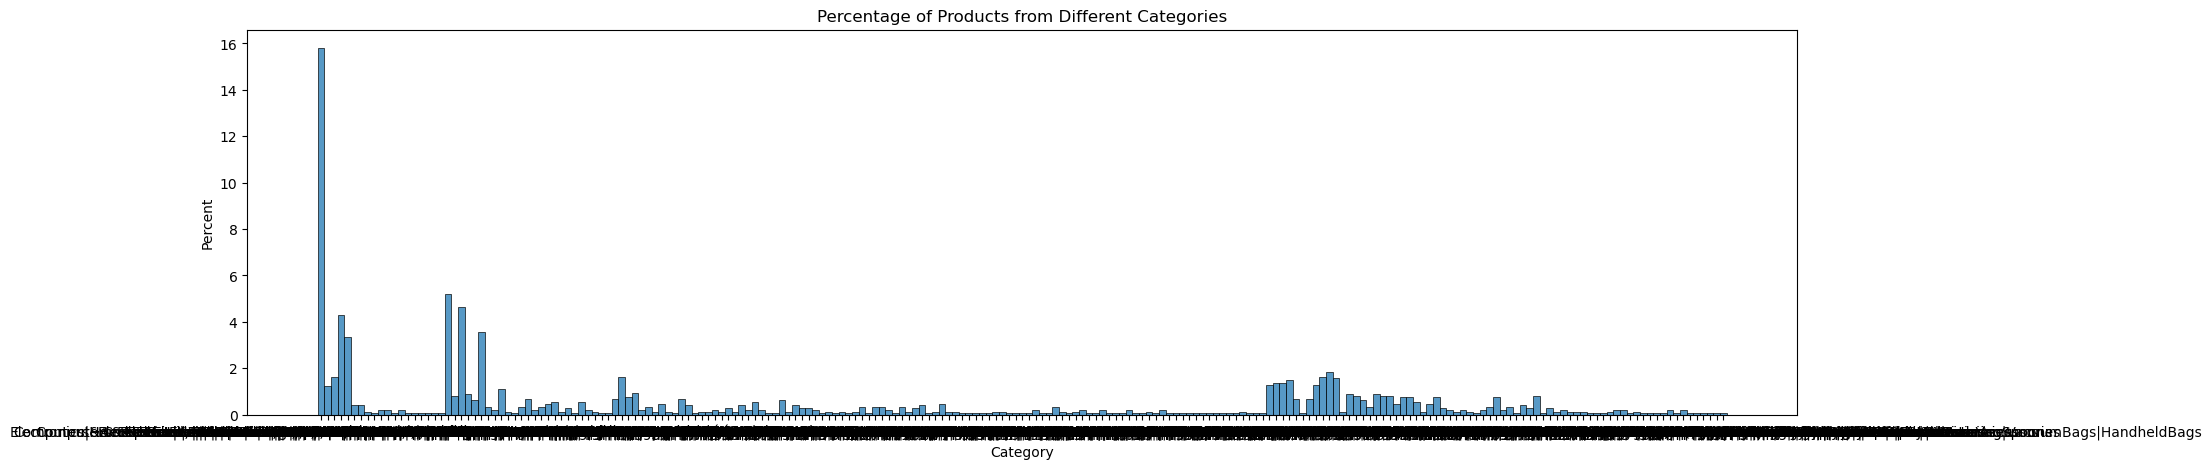

In [11]:
#This histogram shows the percent of products from each category.

plt.figure(figsize=(20,5))

sns.histplot(data=df, x='category', stat='percent')
plt.xlabel('Category')
plt.ylabel('Percent')
plt.title('Percentage of Products from Different Categories')

#This shows that categories 'Electronics', 'Computer and Accessories' and 'Home and Kitchen' have the highest percetages of sale.

Text(0.5, 1.0, 'Relation between Category and Number of Ratings')

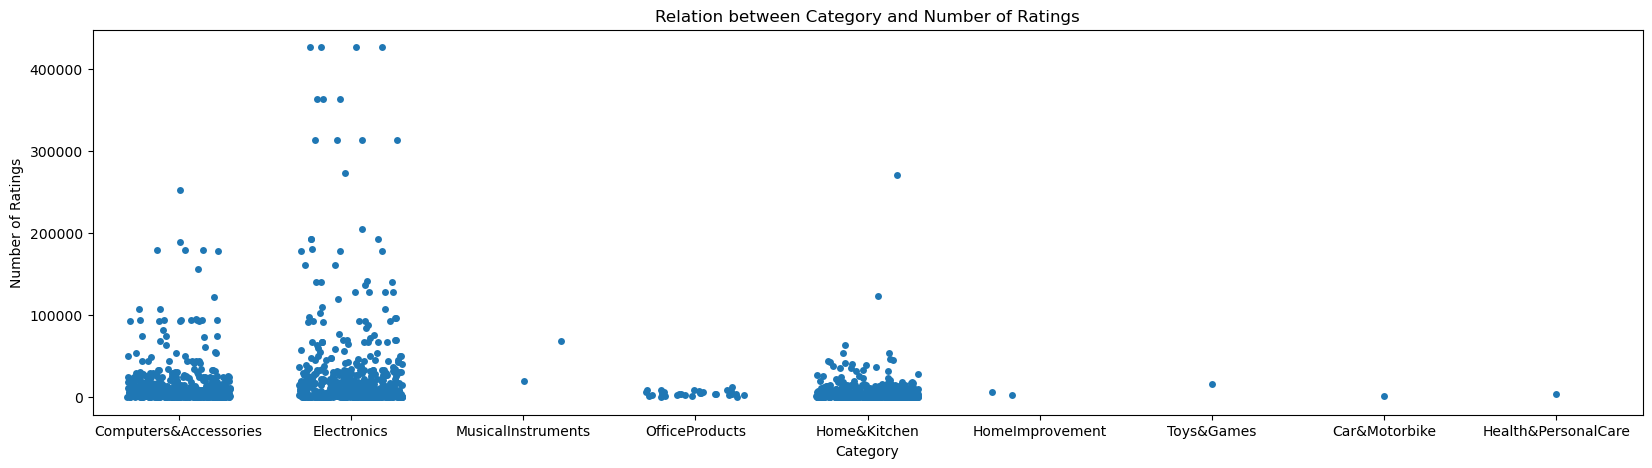

In [ ]:
#Products grouped by Category and counted based on Rating Count

plt.figure(figsize=(20,5))

sns.stripplot(data=df, x='category', y='rating_count', jitter=0.3)
plt.xlabel('Category')
plt.ylabel('Number of Ratings')
plt.title('Relation between Category and Number of Ratings')

#Electronics have the highest rating count and Car and Motorbike and Health and Personal Care have the minimum.

Text(0.5, 1.0, 'Relation between Discount Percentage and Number of Ratings')

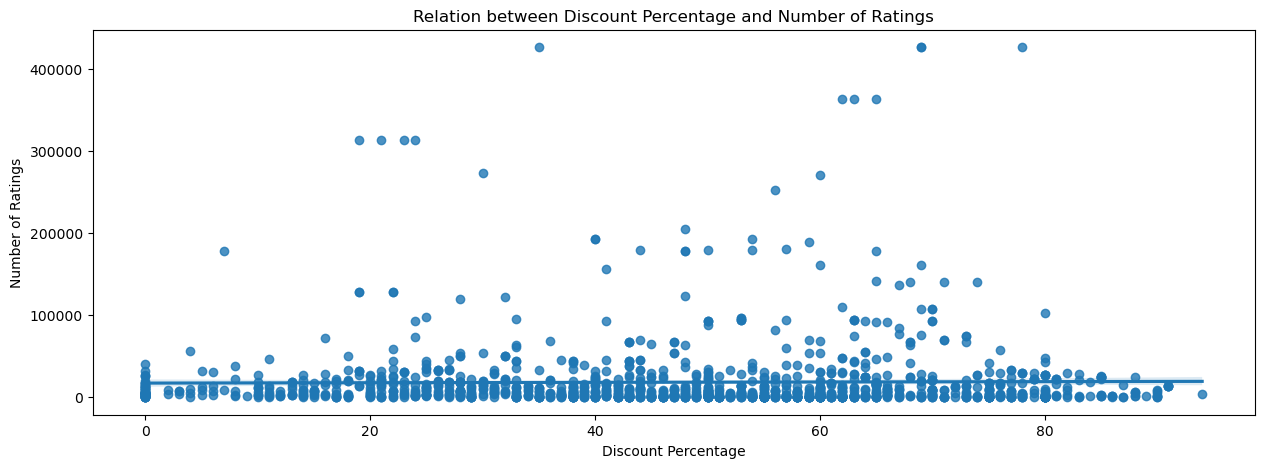

In [ ]:
#This plot tell us the demand (seen from rating_count) of different products on the basis of discount_price.

plt.figure(figsize=(15,5))

sns.regplot(data=df, x='discount_percentage', y='rating_count', )
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Ratings')
plt.title('Relation between Discount Percentage and Number of Ratings')

#This shows us that there was maximum sale of products when they were on a discount of about 40% and 70%-80%. Most people tend to buy products when they find very high discounts. 

## Refined Research question/interests for Milestone 3

1. **How discounts can affect the sales and number of ratings of different products?**

I saw from the last visualisation that the products which have high discounts are tend to be more attractive for customers than the ones which have low discounts on them.

2. **How there is variation in the discount percentage in the top 3 categories?**

For this question, I can plot the variations in the discount percentages for the top 3 categories. This question will be interesting to analyse as it includes visualisations from my other 2 research questions

3. **Which category of products has the highest sale?**

From the first and second visualisation, I saw that there are top 3 categories which have the highest sale.


In [ ]:
df=pd.read_csv('../data/raw/amazon 2.csv')
print("File type:", type(df))
print("Encoding:", df.encoding)
print("Delimiter:", df.dtypes)


In [13]:
print(df.head())


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [14]:
# Removing columns not being used
df = df.drop(columns=["product_link"])

#Replacing Not Available with NaN
df = df.replace("Not available", pd.np.nan)


/var/folders/dg/5ykzc8ms5q99h8472h4rktth0000gn/T/ipykernel_95193/1168283520.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df = df.replace("Not available", pd.np.nan)


In [15]:
#drop all the null values from the dataset
df.dropna(axis=0,how="any",inplace=True) 

# Check if the null values have been removed
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
dtype: int64

In [16]:

df["category_type"] = df["category"].apply(lambda x: x.split(" > ")[0]) #extracting main category
print(df.columns)


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'category_type'],
      dtype='object')


In [ ]:
#find and replacing operation
df = df.replace({"5 star": 5, "4 star": 4, "3 star": 3, "2 star": 2, "1 star": 1})


In [ ]:
#dealing with outliers by calculating the interquartile range, setting lower and upper bounds and selecting only rows with discounter_price within the bounds.
q1 = df["discounted_price"].quantile(0.25)
q3 = df["discounted_price"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df = df[(df["discounted_price"] >= lower_bound) & (df["discounted_price"] <= upper_bound)]

In [18]:
# create a pivot table of discounted price by category 
pivot_table = pd.pivot_table(df, values="discounted_price", index="category", aggfunc="mean")
pivot_table = pivot_table.round(2)
pivot_table

/var/folders/dg/5ykzc8ms5q99h8472h4rktth0000gn/T/ipykernel_95193/2202858863.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table = pd.pivot_table(df, values="discounted_price", index="category", aggfunc="mean")


""
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers
...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens"
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens"
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens"


In [ ]:
def load_and_process(filename):
    df = pd.read_csv(filename)
    
    # Method Chain 1: Remove columns not being used, deal with incorrect data, and deal with missing data
    df = (df.drop(columns=[ "product_link"])
         .replace("Not available", pd.np.nan)
         .dropna())
    
    # Method Chain 2: Create new columns
    df = (df.assign(category_type=df["category"].apply(lambda x: x.split(" > ")[0]))
          .replace({"5 star": 5, "4 star": 4, "3 star": 3, "2 star": 2, "1 star": 1}))
    
    # Method Chain 3: Deal with outliers
    q1 = df["discounted_price"].quantile(0.25)
    q3 = df["discounted_price"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df[(df["discounted_price"] >= lower_bound) & (df["discounted_price"] <= upper_bound)]
    
    
    return df

In [ ]:
from ../code import project_functions1
df = project_functions1.load_and_process('../data/raw/amazon 2.csv')
df

Research Question 1: **How discounts can affect the sales and number of ratings of different products?**

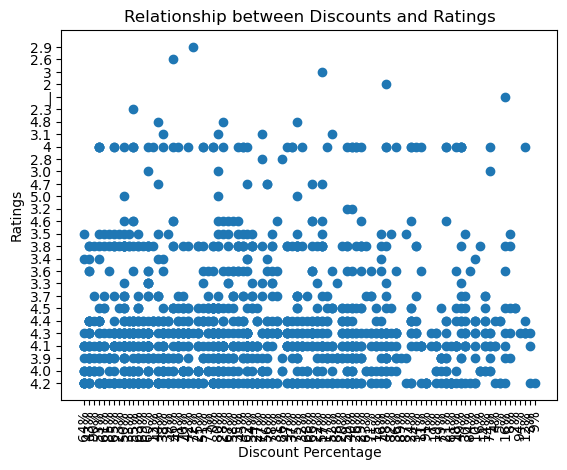

In [33]:

plt.scatter( df["discount_percentage"], df["rating"])
plt.xlabel("Discount Percentage")
plt.ylabel("Ratings")
plt.title("Relationship between Discounts and Ratings")
plt.xticks(rotation=90)
plt.show()


**This scatterplot helps us visualise the relationship between discount percentages and the customer ratings. We can see from the plot that products with higher discount percentages have higher ratings and higher sales. This suggests that customers may be more price-sensitive than rating-sensitive when it comes to purchasing products.**

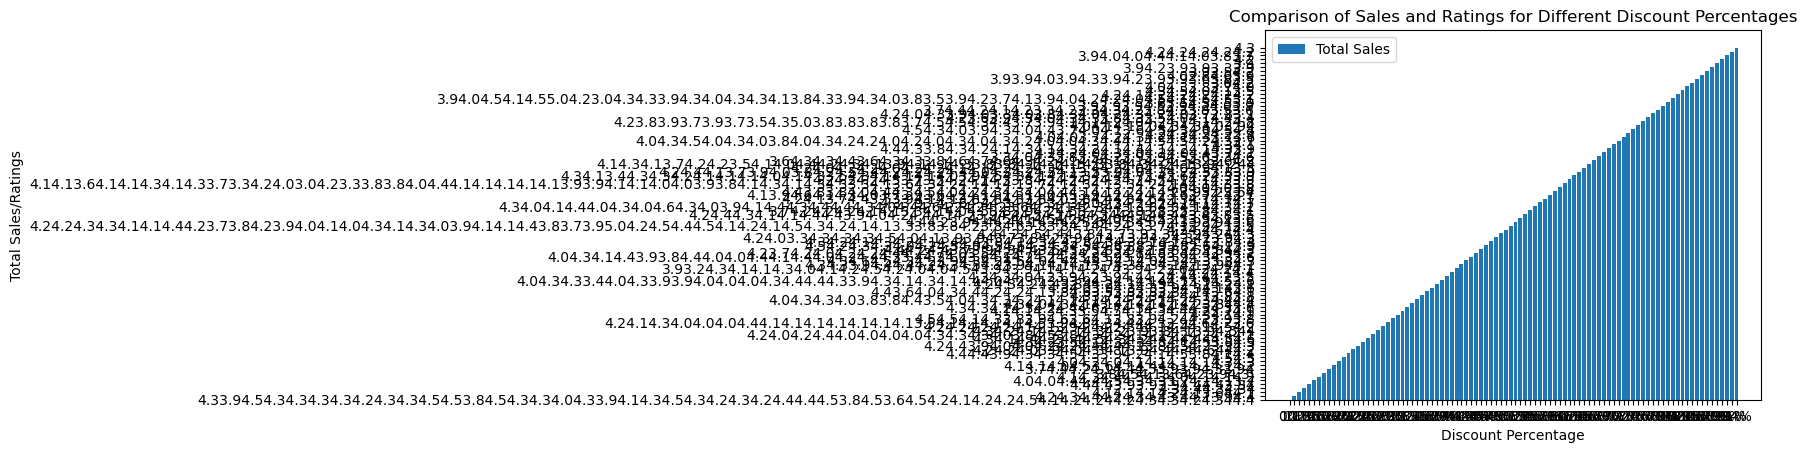

In [45]:
df_grouped = df.groupby("discount_percentage").agg({"rating": "sum"}).reset_index()

plt.bar(df_grouped["discount_percentage"], df_grouped["rating"], label="Total Sales")
plt.xlabel("Discount Percentage")
plt.ylabel("Total Sales/Ratings")
plt.title("Comparison of Sales and Ratings for Different Discount Percentages")
plt.legend()
plt.show()

#I can't understand how to fix the axis labels. I tried rotating them, but it is still not working

**This barplot also helps in showing that with higher discount percentages there are higher sales since there are more ratings.**

Research Question 2: **How there is variation in the discount percentage in the top 3 categories?**

Research Question 3: **Which category of products has the highest sale?**

In [ ]:
#None of the code that I am writing is working. I have tried writing code for data visualizations but they all are running into
#multiple errors. i have even tried to run my previous code of this same notebook and that is also running into an error. I 
#will go to the office hours and fix the issues as soon as possible. Sorry for the delay and confusion. 

In [21]:
df.to_csv('../data/processed/processed.csv', index=False)